## Подготовка данных

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer

### Изучение данных

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv') 

In [3]:
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')

In [4]:
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

Выведем на экран первые десять строк каждой таблицы:

In [5]:
df_train.head(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


In [6]:
df_test.head(10)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
5,2016-09-01 05:59:59,168.485085,8.817007,7.420000,0.791191,1402.826803,-499.299521,1401.511119,-499.205357,1404.088107,...,12.029797,-499.814895,8.036586,-500.371492,8.041446,-510.037054,4.983949,-499.990990,24.978973,-500.475640
6,2016-09-01 06:59:59,144.133440,7.924610,7.420000,0.788838,1398.252401,-499.748672,1393.255503,-499.195380,1396.738566,...,12.026296,-499.473127,8.027984,-500.983079,7.907340,-507.964971,5.010224,-500.043697,25.040709,-499.501984
7,2016-09-01 07:59:59,133.513396,8.055252,6.988000,0.801871,1401.669677,-501.777839,1400.754446,-502.514024,1400.465244,...,12.040911,-501.293852,8.020490,-499.185229,8.116897,-511.927561,5.036498,-500.149615,25.032580,-503.970657
8,2016-09-01 08:59:59,133.735356,7.999618,6.935000,0.789329,1402.358981,-499.981597,1400.985954,-496.802968,1401.168584,...,11.998184,-499.481608,8.012610,-500.896783,7.974422,-521.199104,5.061599,-499.791519,25.005063,-497.613716
9,2016-09-01 09:59:59,126.961069,8.017856,7.030000,0.805298,1400.816120,-499.014158,1399.975401,-499.570552,1401.871924,...,12.040725,-499.987743,7.989503,-499.750625,7.989710,-509.946737,5.068811,-499.293900,24.992741,-499.272255


In [7]:
df_full.head(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


Получим общую информацию о каждой таблице:

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null object
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primary_cleaner.input.depressant             

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
date                                          5290 non-null object
primary_cleaner.input.sulfate                 5286 non-null float64
primary_cleaner.input.depressant              5285 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5286 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
rougher.in

In [10]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
date                                                  19439 non-null object
final.output.concentrate_ag                           19438 non-null float64
final.output.concentrate_pb                           19438 non-null float64
final.output.concentrate_sol                          19228 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19438 non-null float64
final.output.tail_pb                                  19338 non-null float64
final.output.tail_sol                                 19433 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19415 non-null float64
primary_cleaner.input.depressant             

**Изучив файлы с данными, отметим:**

- В таблице df_train (обучающая выборка) 87 признаков; 
- В таблице df_test (тестовая выборка) 53 признака;
- В таблице df_full (исходные данные) также 87 признаков.

Согласно документации к данным **целевые признаки**, который нужно спрогнозировать, — `rougher.output.recovery`(**эффективность обогащения чернового концентрата**) и `final.output.recovery`(**эффективность обогащения финального концентрата**).

### Проверка расчета эффективности обогащения

In [11]:
df_train['rougher.output.recovery']

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Name: rougher.output.recovery, Length: 14149, dtype: float64

**Проведем проверку того, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака `rougher.output.recovery`.**

In [12]:
# формула для расчета эффективности обогащения 
recovery_сheck = (
    (df_train['rougher.output.concentrate_au'] * (df_train['rougher.input.feed_au'] - df_train['rougher.output.tail_au']))/
    (df_train['rougher.input.feed_au'] * (df_train['rougher.output.concentrate_au'] - df_train['rougher.output.tail_au'])) * 100
)
print(recovery_сheck)

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Length: 14149, dtype: float64


**Далее найдем MAE между нашими расчётами и значением признака.**

In [13]:
def mae_сheck(real_values, сalculations): # создадим функцию для расчета MAE
   error = 0
   for i in range(real_values.shape[0]):
        error += abs(real_values[i] - сalculations[i])
   return error / real_values.shape[0] 
 
real_values = pd.Series(df_train['rougher.output.recovery'])
сalculations = pd.Series(recovery_сheck)

mae_сheck(real_values, сalculations)

9.682896147825551e-15

In [14]:
# дополнительно посчитаем MAE через функцию из sklearn
print('Значение MAE:', mean_absolute_error(df_train['rougher.output.recovery'], recovery_сheck))

Значение MAE: 9.682896147825551e-15


**Вывод**

Так как MAE между расчётами и значением признака практически нулевое, можно прийти к выводу, что эффективность обогащения рассчитана правильно.

### Анализ признаков, недоступных в тестовой выборке

In [15]:
columns_train = df_train.columns.values.tolist()

In [16]:
columns_test = df_test.columns.values.tolist()

In [17]:
# найдем признаки, недоступные в тестовой выборке
columns_test_inaccessible = []

for i in columns_train: 
    if i not in columns_test:
        columns_test_inaccessible.append(i)

print(len(columns_test_inaccessible))
print('\n'.join(columns_test_inaccessible))

34
final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
rougher.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_clean

**Вывод**

Проанализировав признаки, недоступные в тестовой выборке, отметим, что это, во-первых, целевые признаки, а, во-вторых, значения с параметрами продукта (output) и  расчётными характеристиками (calculation). Согласно описанию проекта, данные параметры недоступны в тестовой выборке, потому что замеряются и/или рассчитываются значительно позже.

### Предобработка данных

Так как данные в таблицах индексируются датой и временем получения информации (признак date), а также соседние по времени параметры часто похожи, заполним пропущенные значения методом **fillna() с аргументом `method = ffill`** (таким образом метод заполнит пропущенное значение предыдущим значением в столбце).

In [18]:
df_train = df_train.fillna(method="ffill")

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null object
final.output.concentrate_ag                           14149 non-null float64
final.output.concentrate_pb                           14149 non-null float64
final.output.concentrate_sol                          14149 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14149 non-null float64
final.output.tail_sol                                 14149 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14149 non-null float64
primary_cleaner.input.depressant             

In [20]:
df_test = df_test.fillna(method="ffill") 

In [21]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
date                                          5290 non-null object
primary_cleaner.input.sulfate                 5290 non-null float64
primary_cleaner.input.depressant              5290 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5290 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
rougher.in

In [22]:
df_full = df_full.fillna(method="ffill") 

In [23]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
date                                                  19439 non-null object
final.output.concentrate_ag                           19439 non-null float64
final.output.concentrate_pb                           19439 non-null float64
final.output.concentrate_sol                          19439 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19439 non-null float64
final.output.tail_pb                                  19439 non-null float64
final.output.tail_sol                                 19439 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19439 non-null float64
primary_cleaner.input.depressant             

## Анализ данных

### Изучение изменения концентрации металлов (Au, Ag, Pb) на различных этапах очистки

Изучим, как меняется средняя концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

In [24]:
data_au = [['Концентрация золота до флотации/очистки', df_full['rougher.input.feed_au'].mean()],
           ['Концентрация золота после флотации', df_full['rougher.output.concentrate_au'].mean()],
           ['Концентрация золота после первичной очистки', df_full['primary_cleaner.output.concentrate_au'].mean()],
           ['Финальная концентрация золота', df_full['final.output.concentrate_au'].mean()]]
columns_au = ['Этап очистки', 'Среднее значение концентрации золота']

metal_concentration_au = pd.DataFrame(data=data_au, columns=columns_au)

display(metal_concentration_au) # Таблица с концентрацией золота на различных этапах очистки

,Этап очистки,Среднее значение концентрации золота
0,Концентрация золота до флотации/очистки,8.266097
1,Концентрация золота после флотации,19.772000
2,Концентрация золота после первичной очистки,32.119400
3,Финальная концентрация золота,44.076513


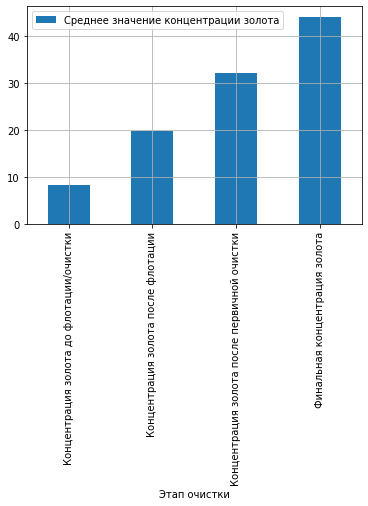

In [25]:
# построим график изменения концентрации золота
metal_concentration_au.plot(x='Этап очистки', 
                            y='Среднее значение концентрации золота', 
                            kind='bar', legend = True, grid = True)

In [26]:
data_ag = [['Концентрация серебра до флотации/очистки', df_full['rougher.input.feed_ag'].mean()],
           ['Концентрация серебра после флотации', df_full['rougher.output.concentrate_ag'].mean()],
           ['Концентрация серебра после первичной очистки', df_full['primary_cleaner.output.concentrate_ag'].mean()],
           ['Финальная концентрация серебра', df_full['final.output.concentrate_ag'].mean()]]
columns_ag = ['Этап очистки', 'Среднее значение концентрации серебра']

metal_concentration_ag = pd.DataFrame(data=data_ag, columns=columns_ag)

display(metal_concentration_ag) # Таблица с концентрацией серебра на различных этапах очистки

,Этап очистки,Среднее значение концентрации серебра
0,Концентрация серебра до флотации/очистки,8.794927
1,Концентрация серебра после флотации,11.994759
2,Концентрация серебра после первичной очистки,8.442408
3,Финальная концентрация серебра,5.168387


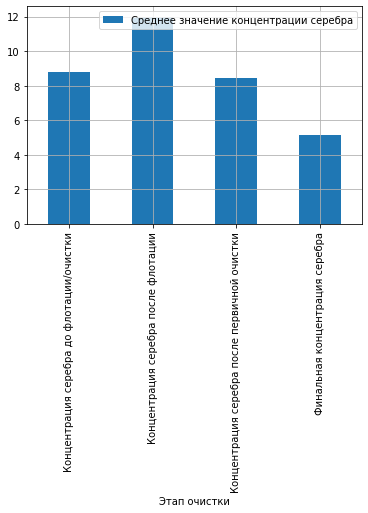

In [27]:
# построим график изменения концентрации серебра
metal_concentration_ag.plot(x='Этап очистки', 
                            y='Среднее значение концентрации серебра', 
                            kind='bar', legend = True, grid = True)

In [28]:
data_pb = [['Концентрация свинца до флотации/очистки', df_full['rougher.input.feed_pb'].mean()],
           ['Концентрация свинца после флотации', df_full['rougher.output.concentrate_pb'].mean()],
           ['Концентрация свинца после первичной очистки', df_full['primary_cleaner.output.concentrate_pb'].mean()],
           ['Финальная концентрация свинца', df_full['final.output.concentrate_pb'].mean()]]
columns_pb = ['Этап очистки', 'Среднее значение концентрации свинца']

metal_concentration_pb = pd.DataFrame(data=data_pb, columns=columns_pb)

display(metal_concentration_pb) # Таблица с концентрацией свинца на различных этапах очистки

,Этап очистки,Среднее значение концентрации свинца
0,Концентрация свинца до флотации/очистки,3.585096
1,Концентрация свинца после флотации,7.606272
2,Концентрация свинца после первичной очистки,9.810317
3,Финальная концентрация свинца,9.978821


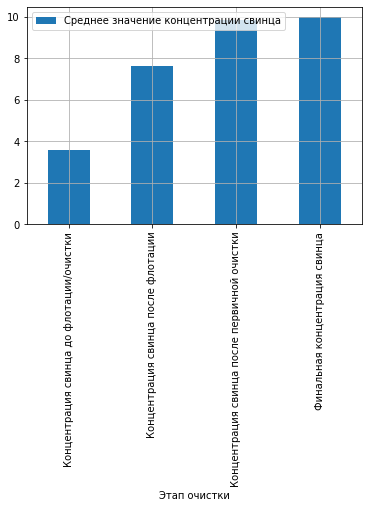

In [29]:
# построим график изменения концентрации свинца
metal_concentration_pb.plot(x='Этап очистки', 
                            y='Среднее значение концентрации свинца', 
                            kind='bar', legend = True, grid = True)

**Вывод**

На основе изученных данных, можно прийти к выводу, что концентрация золота на различных этапах очистки в среднем увеличивается, что логично для процесса получения золота из руды. В то же время концентрация серебра наиболее высокая после флотации, а далее снижается. Что касается концентрации свинца, то на каждом этапе она так же, как и для золота, увеличивается, но после первичной очистки и на финальной стадии концентрация в среднем практически на одном уровне.

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках

In [30]:
df_train['rougher.input.feed_size'].describe() # изучим столбец с размерами гранул сырья в обучающей выборке

count    14149.000000
mean        60.239856
std         23.005310
min          9.659576
25%         48.966751
50%         55.269784
75%         66.007526
max        484.967466
Name: rougher.input.feed_size, dtype: float64

In [31]:
df_test['rougher.input.feed_size'].describe() # изучим столбец с размерами гранул сырья в тестовой выборке

count    5290.000000
mean       55.952754
std        19.080334
min         0.046369
25%        43.906504
50%        50.846843
75%        62.451165
max       392.494040
Name: rougher.input.feed_size, dtype: float64

In [32]:
data_feed_size = [['Размер гранул сырья (обучающая выборка)', df_train['rougher.input.feed_size'].mean(), 
                   np.std(df_train['rougher.input.feed_size']), np.var(df_train['rougher.input.feed_size'])],
           ['Размер гранул сырья (тестовая выборка)', df_test['rougher.input.feed_size'].mean(), 
            np.std(df_test['rougher.input.feed_size']), np.var(df_test['rougher.input.feed_size'])]]

columns_feed_size = ['Выборка', 'Среднее значение', 'Стандартное отклонение', 'Дисперсия']

compare_feed_size = pd.DataFrame(data=data_feed_size, columns=columns_feed_size)

display(compare_feed_size) # Таблица с характеристиками 

,Выборка,Среднее значение,Стандартное отклонение,Дисперсия
0,Размер гранул сырья (обучающая выборка),60.239856,23.004497,529.206865
1,Размер гранул сырья (тестовая выборка),55.952754,19.078531,363.990329


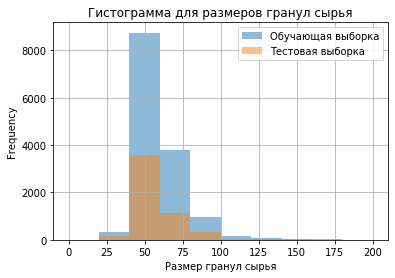

In [33]:
df_train['rougher.input.feed_size'].plot.hist(legend = True, alpha = 0.5, grid = True, range = (0, 200))
df_test['rougher.input.feed_size'].plot.hist(legend = True, alpha = 0.5, grid = True, range = (0, 200))
plt.title('Гистограмма для размеров гранул сырья')
plt.xlabel('Размер гранул сырья')
plt.legend(['Обучающая выборка', 'Тестовая выборка'])
plt.show()

**Вывод**

Видно, что на входе процесса стараются поддерживать размер гранул в 55-60 микрон, есть незначительное смещение распределения от нормального в сторону увеличения гранул. Сравнив распределения размеров гранул сырья на обучающей и тестовой выборках, и, учитывая разницу размеров выборок, можно предположить, что распределения не сильно отличаются друг от друга. Таким образом, визуально значительных различий между train и test не наблюдается. Также, на тестовой выборке имеется большее значение очень маленьких гранул. Среднее значение, стандартное отклонение, а также дисперсия в обучающей выборке, больше, чем в тестовой.

### Анализ суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

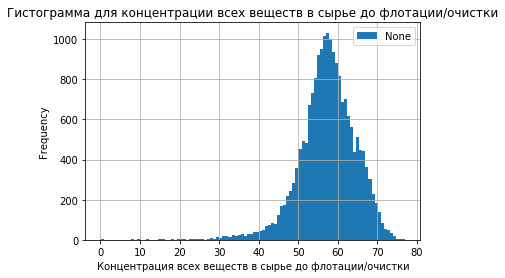

In [34]:
total_concentration_rougher_input = df_full[['rougher.input.feed_ag', 
                                             'rougher.input.feed_pb', 
                                             'rougher.input.feed_sol', 
                                             'rougher.input.feed_au']].sum(axis=1)
total_concentration_rougher_input.plot(kind='hist', legend = True, grid = True, bins=100) # построим гистограмму
plt.title('Гистограмма для концентрации всех веществ в сырье до флотации/очистки')
plt.xlabel('Концентрация всех веществ в сырье до флотации/очистки')
plt.show()

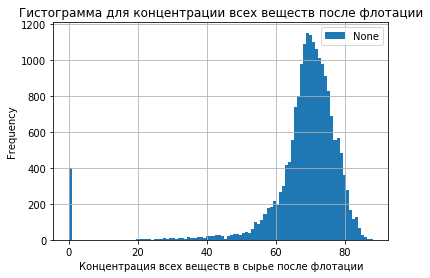

In [35]:
total_concentration_rougher_output = df_full[['rougher.output.concentrate_ag', 
                                              'rougher.output.concentrate_pb', 
                                              'rougher.output.concentrate_sol', 
                                              'rougher.output.concentrate_au']].sum(axis=1)
total_concentration_rougher_output.plot(kind='hist', legend = True, grid = True, bins=100) # построим гистограмму
plt.title('Гистограмма для концентрации всех веществ после флотации')
plt.xlabel('Концентрация всех веществ в сырье после флотации')
plt.show()

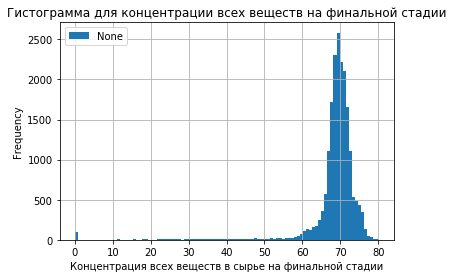

In [36]:
total_concentration_final_output = df_full[['final.output.concentrate_ag', 
                                            'final.output.concentrate_pb',
                                            'final.output.concentrate_sol',
                                            'final.output.concentrate_au']].sum(axis=1)
total_concentration_final_output.plot(kind='hist', legend = True, grid = True, bins=100) # построим гистограмму
plt.title('Гистограмма для концентрации всех веществ на финальной стадии')
plt.xlabel('Концентрация всех веществ в сырье на финальной стадии')
plt.show()

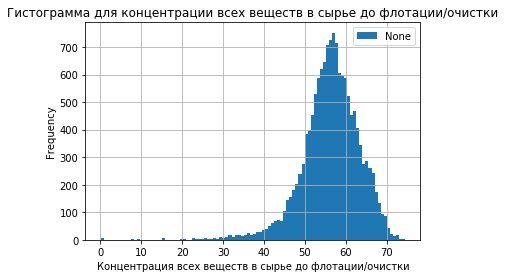

In [37]:
total_concentration_rougher_input_train = df_train[['rougher.input.feed_ag', 
                                                    'rougher.input.feed_pb',
                                                    'rougher.input.feed_sol',
                                                    'rougher.input.feed_au']].sum(axis=1)
total_concentration_rougher_input_train.plot(kind='hist', legend = True, grid = True, bins=100) # построим гистограмму
plt.title('Гистограмма для концентрации всех веществ в сырье до флотации/очистки')
plt.xlabel('Концентрация всех веществ в сырье до флотации/очистки')
plt.show()

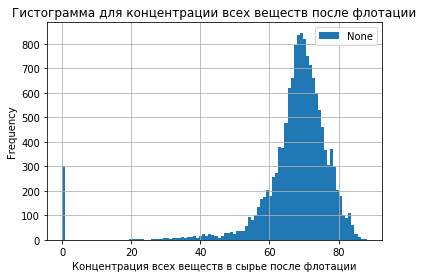

In [38]:
total_concentration_rougher_output_train = df_train[['rougher.output.concentrate_ag',
                                                     'rougher.output.concentrate_pb',
                                                     'rougher.output.concentrate_sol',
                                                     'rougher.output.concentrate_au']].sum(axis=1)
total_concentration_rougher_output_train.plot(kind='hist', legend = True, grid = True, bins=100) # построим гистограмму
plt.title('Гистограмма для концентрации всех веществ после флотации')
plt.xlabel('Концентрация всех веществ в сырье после флотации')
plt.show()

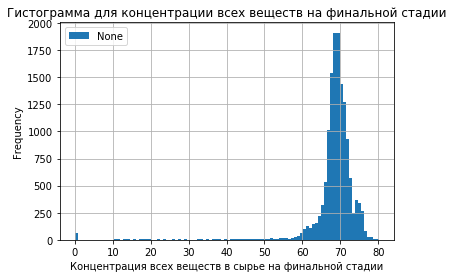

In [39]:
total_concentration_final_output_train = df_train[['final.output.concentrate_ag',
                                                   'final.output.concentrate_pb',
                                                   'final.output.concentrate_sol',
                                                   'final.output.concentrate_au']].sum(axis=1)
total_concentration_final_output_train.plot(kind='hist', legend = True, grid = True, bins=100) # построим гистограмму
plt.title('Гистограмма для концентрации всех веществ на финальной стадии')
plt.xlabel('Концентрация всех веществ в сырье на финальной стадии')
plt.show()

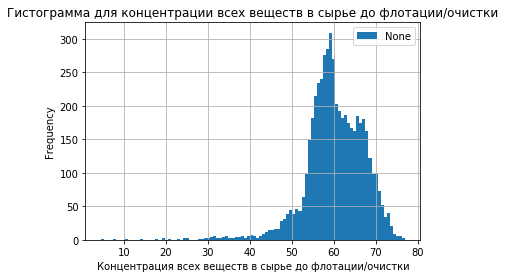

In [40]:
total_concentration_rougher_input_test = df_test[['rougher.input.feed_ag', 
                                                  'rougher.input.feed_pb',
                                                  'rougher.input.feed_sol',
                                                  'rougher.input.feed_au']].sum(axis=1)
total_concentration_rougher_input_test.plot(kind='hist', legend = True, grid = True, bins=100) # построим гистограмму
plt.title('Гистограмма для концентрации всех веществ в сырье до флотации/очистки')
plt.xlabel('Концентрация всех веществ в сырье до флотации/очистки')
plt.show()

**Вывод**

Исследовав суммарную концентрацию всех веществ на разных стадиях, отметим, что в данных присутствуют аномальные значения около 0. Соответственно, удалим их из обучающей и тестовой выборки.

In [41]:
# удалим аномальные значения из обучающей выборки
df_train_filtered = ((df_train[['rougher.input.feed_ag', 'rougher.input.feed_pb',
                                'rougher.input.feed_sol', 'rougher.input.feed_au']].sum(axis=1) > 10) &
                    (df_train[['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb',
                               'rougher.output.concentrate_sol', 'rougher.output.concentrate_au']].sum(axis=1) > 10) &
                    (df_train[['final.output.concentrate_ag', 'final.output.concentrate_pb',
                               'final.output.concentrate_sol', 'final.output.concentrate_au']].sum(axis=1) > 10))
df_train_main = df_train[df_train_filtered]

In [42]:
# удалим аномальные значения из тестовой выборки
df_test_filtered = ((df_test[['rougher.input.feed_ag', 'rougher.input.feed_pb',
                              'rougher.input.feed_sol', 'rougher.input.feed_au']].sum(axis=1) > 10))
df_test_main = df_test[df_test_filtered]

## Модель

### Функция для вычисления итоговой sMAPE

Создадим функцию для вычисления итоговой sMAPE.

In [43]:
def sMAPE(targets, predictions):
    targets = targets.to_numpy()
    rougher_target = targets[:, 0]
    final_target = targets[:, 1]
    rougher_predict = predictions[:, 0]
    final_predict = predictions[:, 1]
    rougher_sMAPE = (abs(rougher_target - rougher_predict) / 
                     ((abs(rougher_target) + abs(rougher_predict)) / 2)).sum() / len(rougher_target) * 100
    final_sMAPE = (abs(final_target - final_predict) / 
                   ((abs(final_target) + abs(final_predict)) / 2)).sum() / len(final_target) * 100
    return 0.25 * rougher_sMAPE + 0.75 * final_sMAPE

### Обучение моделей и оценка их качества кросс-валидацией. Выбор лучшей модель и проверка на тестовой выборке

Обучим модели только на тех признаках, которые есть в тестовой выборке.

In [44]:
features_train = df_train_main.drop(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 
                               'final.output.concentrate_sol', 'final.output.concentrate_au',
                               'final.output.recovery', 'final.output.tail_ag',
                               'final.output.tail_pb', 'final.output.tail_sol',
                               'final.output.tail_au', 'primary_cleaner.output.concentrate_ag',
                               'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol',
                               'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_ag',
                               'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
                               'primary_cleaner.output.tail_au', 'rougher.calculation.sulfate_to_au_concentrate',
                               'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed',
                               'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag',
                               'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
                               'rougher.output.concentrate_au', 'rougher.output.recovery',
                               'rougher.output.tail_ag', 'rougher.output.tail_pb',
                               'rougher.output.tail_sol', 'rougher.output.tail_au',
                               'secondary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_pb',
                               'secondary_cleaner.output.tail_sol', 'secondary_cleaner.output.tail_au'], axis=1)

In [45]:
target_train = df_train_main[['rougher.output.recovery', 'final.output.recovery']]

In [46]:
# через функцию make_scorer превратим функцию sMAPE в метрику, которую используем в cross_val_score
own_score = make_scorer(sMAPE, greater_is_better=False)

In [47]:
numeric = df_test_main.drop(['date'], axis=1).columns.values.tolist()

In [48]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])
pd.options.mode.chained_assignment = None
features_train[numeric] = scaler.transform(features_train[numeric])

In [51]:
# обучим модель линейной регрессии
model_lr = LinearRegression()
scores_lr = cross_val_score(model_lr, features_train, target_train, scoring = own_score, cv=5)
final_score_lr = sum(scores_lr) / len(scores_lr)
print('Средняя оценка качества модели для линейной регрессии:', final_score_lr)

Средняя оценка качества модели: -10.029544166382296


In [55]:
for samples_leaf in range(1, 11): # поиск лучшего гиперпараметра «минимальное количество объектов в листе» для дерева решений
    model = DecisionTreeRegressor(random_state=12345, max_depth=10, min_samples_split=2, min_samples_leaf=samples_leaf)
    scores = cross_val_score(model, features_train, target_train, scoring = own_score, cv=5)
    final_score = sum(scores) / len(scores)
    print(final_score)

-13.092672829602119
-14.35208632066453
-12.365456844078818
-12.075208285838432
-12.129364809234483
-11.669575984226574
-11.818084886880449
-11.682772783544204
-11.380673848190334
-11.249144899016251


In [56]:
for depth in range(1, 16, 1): # поиск лучшей глубины для дерева решений
    model = DecisionTreeRegressor(random_state=12345, max_depth=depth, min_samples_split=2, min_samples_leaf=10)
    scores = cross_val_score(model, features_train, target_train, scoring = own_score, cv=5)
    final_score = sum(scores) / len(scores)
    print(final_score)

-8.95946929825476
-9.181218804955545
-9.10805255093371
-9.50336693967338
-10.85209786370466
-11.335966563880529
-10.778877247150522
-11.14219147946385
-11.053856870498901
-11.249144899016251
-11.197563627762518
-12.220908641829503
-11.395024336406902
-11.670477330339704
-11.983107146764212


In [61]:
# обучим модель дерева решений с подобранными гиперпараметрами
model_dt = DecisionTreeRegressor(random_state=12345, max_depth=1, min_samples_split=2, min_samples_leaf=10)
scores_dt = cross_val_score(model_dt, features_train, target_train, scoring = own_score, cv=5)
final_score_dt = sum(scores_dt) / len(scores_dt)
print("Средняя оценка качества модели для лучшей модели дерева решений:", final_score_dt)

Средняя оценка качества модели для лучшей модели дерева решений: -8.95946929825476


In [62]:
for depth in range(1, 16, 1): # поиск лучшей глубины для модели случайного леса
    model = RandomForestRegressor(n_estimators=20, max_depth=depth, random_state=12345)
    scores = cross_val_score(model, features_train, target_train, scoring = own_score, cv=5)
    final_score = sum(scores) / len(scores)
    print(final_score)

-9.028743155440946
-9.11171238143329
-8.74610628937857
-8.712943924917557
-9.014385517138617
-9.201603080857954
-9.327383282995985
-9.570305424183747
-9.584016201035313
-9.646555338644927
-9.752348251942085
-9.76527305074714
-9.724974074909408
-9.663776487238975
-9.694978700888946


In [63]:
for est in range(10, 101, 10):  # поиск лучшего количества деревьев для модели случайного леса 
    model = RandomForestRegressor(n_estimators=est, max_depth=4, random_state=12345)
    scores = cross_val_score(model, features_train, target_train, scoring = own_score, cv=5)
    final_score = sum(scores) / len(scores)
    print(final_score)

-8.754127984136677
-8.712943924917557
-8.68666493297843
-8.752098623852177
-8.799368643967055
-8.831507794212758
-8.865520529352164
-8.879647406668797
-8.87686474028022
-8.87907511113567


In [64]:
# обучим модель случайного леса с подобранными гиперпараметрами
model_rf = RandomForestRegressor(n_estimators=30, max_depth=4, random_state=12345)
scores_rf = cross_val_score(model_rf, features_train, target_train, scoring = own_score, cv=5)
final_score_rf = sum(scores_rf) / len(scores_rf)
print("Средняя оценка качества модели для лучшей модели случайного леса:", final_score_rf)

Средняя оценка качества модели для лучшей модели случайного леса: -8.68666493297843


**Для проверки модели на тестовой выборке возьмем модель случайного леса с глубиной, равной 4, и количеством деревьев — 30, которая оказалась лучше остальных c симметричным средним абсолютным процентным отклонением 8.68% (в данном случае игнорируем минус перед значением, который возникает из-за аргумента greater_is_better=False).**

In [65]:
# присоединим к тестовой выборке целевые признаки по совпадающим значениям столбца date
df_test_main_with_targets = pd.merge(df_test_main,df_full[['date','rougher.output.recovery', 'final.output.recovery']],on='date', how='left')

In [67]:
df_test_main_with_targets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5288 entries, 0 to 5287
Data columns (total 55 columns):
date                                          5288 non-null object
primary_cleaner.input.sulfate                 5288 non-null float64
primary_cleaner.input.depressant              5288 non-null float64
primary_cleaner.input.feed_size               5288 non-null float64
primary_cleaner.input.xanthate                5288 non-null float64
primary_cleaner.state.floatbank8_a_air        5288 non-null float64
primary_cleaner.state.floatbank8_a_level      5288 non-null float64
primary_cleaner.state.floatbank8_b_air        5288 non-null float64
primary_cleaner.state.floatbank8_b_level      5288 non-null float64
primary_cleaner.state.floatbank8_c_air        5288 non-null float64
primary_cleaner.state.floatbank8_c_level      5288 non-null float64
primary_cleaner.state.floatbank8_d_air        5288 non-null float64
primary_cleaner.state.floatbank8_d_level      5288 non-null float64
rougher.in

In [70]:
features_test = df_test_main_with_targets.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1) 

In [71]:
target_test = df_test_main_with_targets[['rougher.output.recovery', 'final.output.recovery']]

In [73]:
numeric_test = df_test_main_with_targets.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1).columns.values.tolist()

In [74]:
scaler_test = StandardScaler()
scaler_test.fit(features_train[numeric_test])
pd.options.mode.chained_assignment = None
features_test[numeric_test] = scaler_test.transform(features_test[numeric_test])

In [75]:
# проверим лучшую модель случайного леса на тестовой выборке
model_rf_test = RandomForestRegressor(n_estimators=30, max_depth=4, random_state=12345)
scores_rf_test = cross_val_score(model_rf_test, features_test, target_test, scoring = own_score, cv=5)
final_score_rf_test = sum(scores_rf_test) / len(scores_rf_test)
print("Средняя оценка качества модели для лучшей модели случайного леса (на тестовой выборке):", final_score_rf_test)

Средняя оценка качества модели для лучшей модели случайного леса (на тестовой выборке): -10.57007688640951


## Общий вывод

Для ответ на вопрос исследования были изучены таблицы с данными, проведена подготовка наборов данных, проанализированы данные, а также обучены и проверены модели.

**В результате финального тестирования было установлено:**

- Лучшей моделью для прогноза коэффициента восстановления золота из золотосодержащей руды стала модель случайного леса.


- Для данной модели случайного леса в результате проверки на тестовой выборке удалось достичь наименьшее значение метрики качества sMAPE — 10.57%.